In [6]:
## load single cell expression data
import pandas as pd
import scvelo as scv
import anndata as adata

In [7]:
adata = adata.read("HSC.h5ad")

In [8]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 6602 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.


In [9]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:11) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


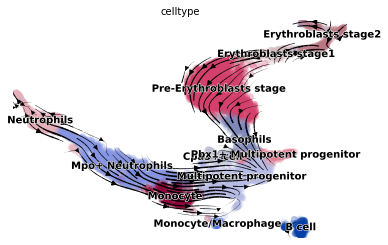

In [11]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, basis='umap',color="celltype")

## Dynamic model

In [12]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/64 cores)


  0%|          | 0/419 [00:00<?, ?gene/s]

    finished (0:02:36) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [13]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


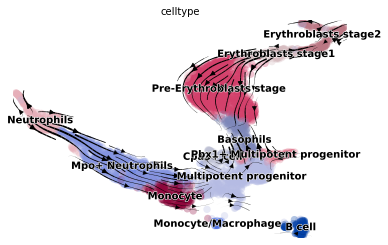

In [15]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color="celltype")

## Using Steady state to perform RNA velocity

In [33]:
scv.tl.velocity(adata,mode='deterministic')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [34]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


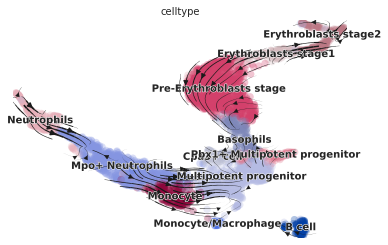

In [35]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color="celltype")

## Using cytotrace to estimate differentiation potency

In [25]:
from cellrank.tl.kernels import CytoTRACEKernel

In [53]:
ctk = CytoTRACEKernel(adata)

In [27]:
ctk

<CytoTRACEKernel>

In [28]:
adata

AnnData object with n_obs × n_vars = 4444 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.75', 'seurat_clusters', 'celltype', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'ct_num_exp_genes', 'ct_score', 'ct_pseudotime'
    var: 'genes', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'fit_r2', 'ct_gene_corr', 'ct_correlates'
    uns: 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'celltype_colors', 'recover_dynamics', 'pca', 'ct_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'loss', 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'veloci

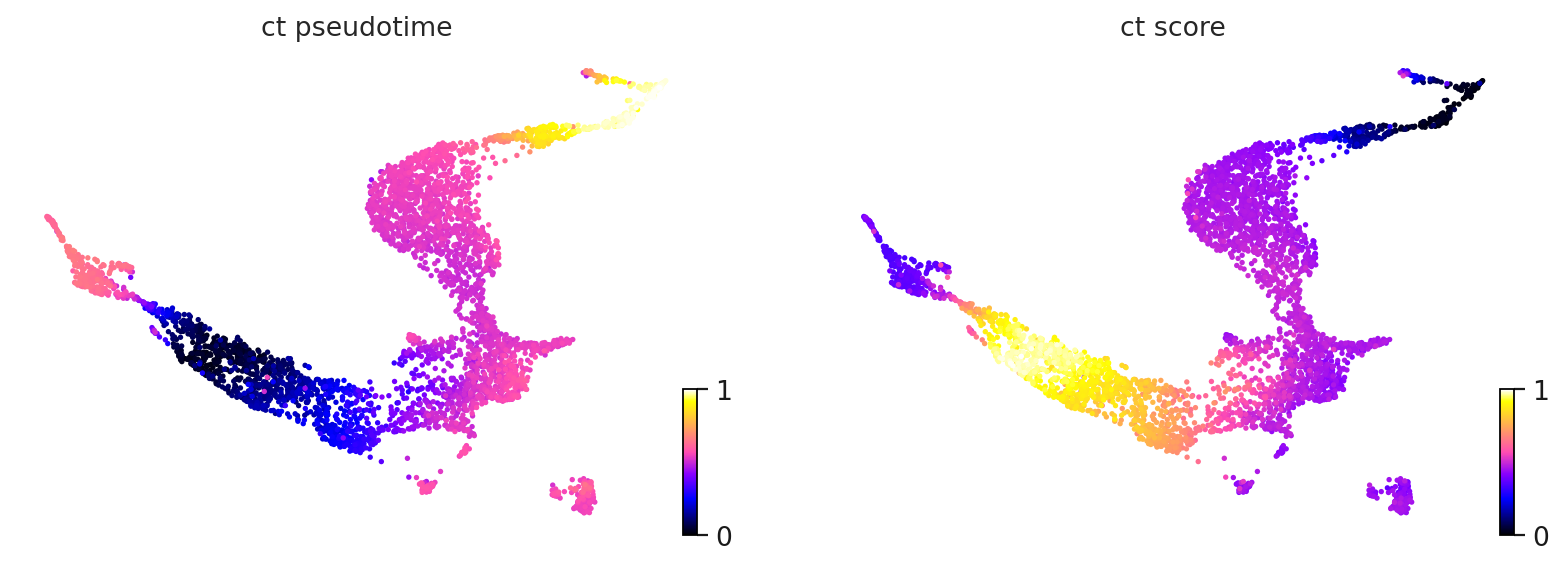

In [103]:
scv.pl.scatter(
    adata,
    c=["ct_pseudotime", "ct_score"],
    basis="X_umap",
    legend_loc="right",
    color_map="gnuplot2",
)

## Visualize raw dataset

In [36]:
import anndata

In [38]:
adata_raw = anndata.read("HSC_raw.h5ad")

In [44]:
import scanpy as sc
sc.pp.neighbors(adata_raw, n_neighbors=10, n_pcs=20)

In [45]:
ctk_raw = CytoTRACEKernel(adata_raw, layer='X')

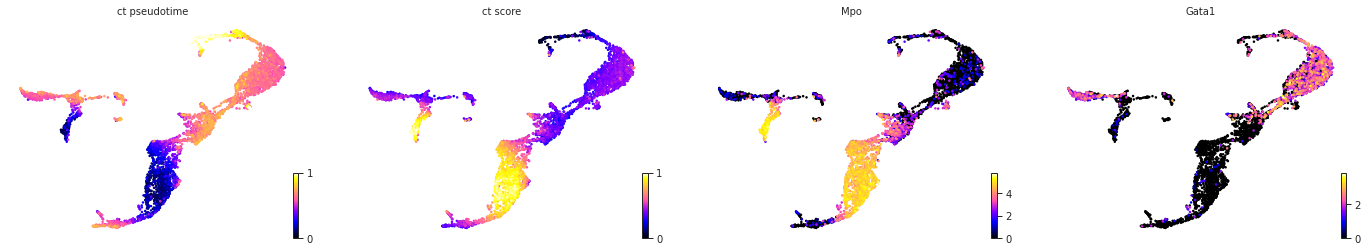

In [56]:
scv.pl.scatter(
    adata_raw,
    c=["ct_pseudotime", "ct_score","Mpo","Gata1"],
    basis="X_umap",
    legend_loc="right",
    color_map="gnuplot2",
)

In [102]:
adata.write("HSC_processed.h5ad")

In [97]:
import pandas as pd
score = pd.read_csv("/mnt/data1/weixu+DL/score2.csv")

In [71]:
type(score['score'])

pandas.core.series.Series

In [98]:
adata.obs["SCENT_score"] = score['score'].tolist()

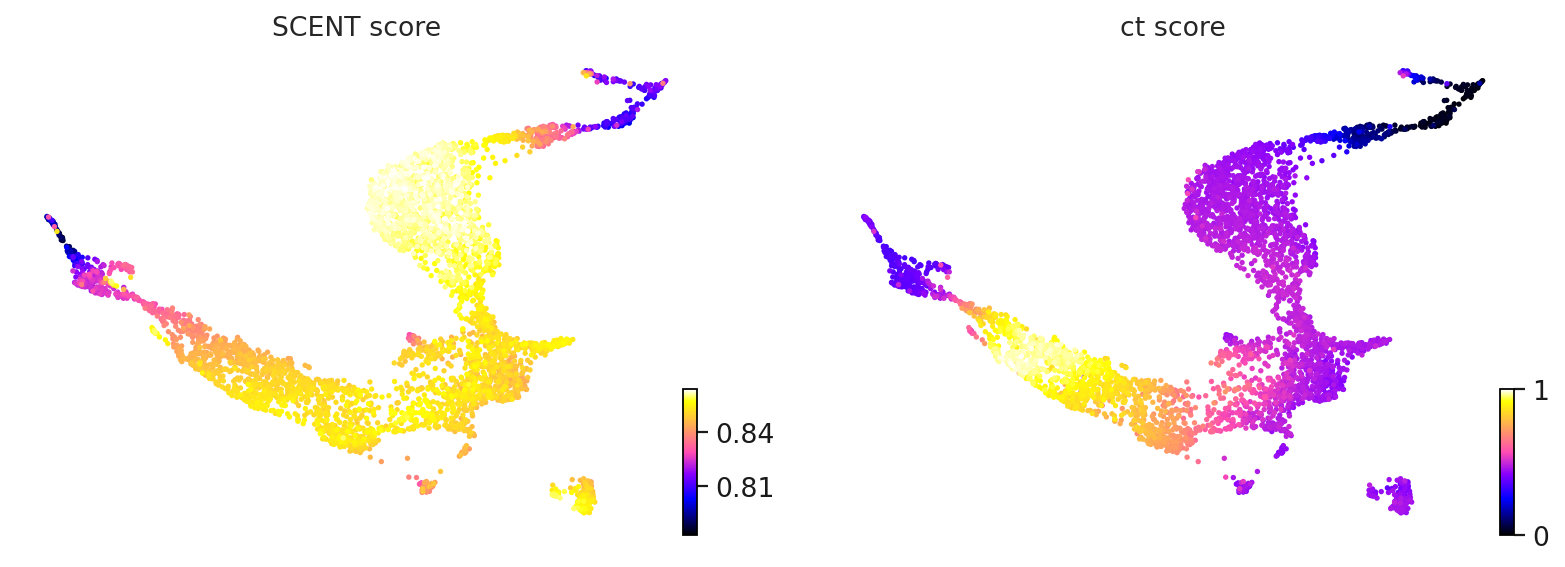

In [101]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization
scv.pl.scatter(
    adata,
    c=["SCENT_score", "ct_score"],
    basis="X_umap",
    legend_loc="right",
    color_map="gnuplot2",
)

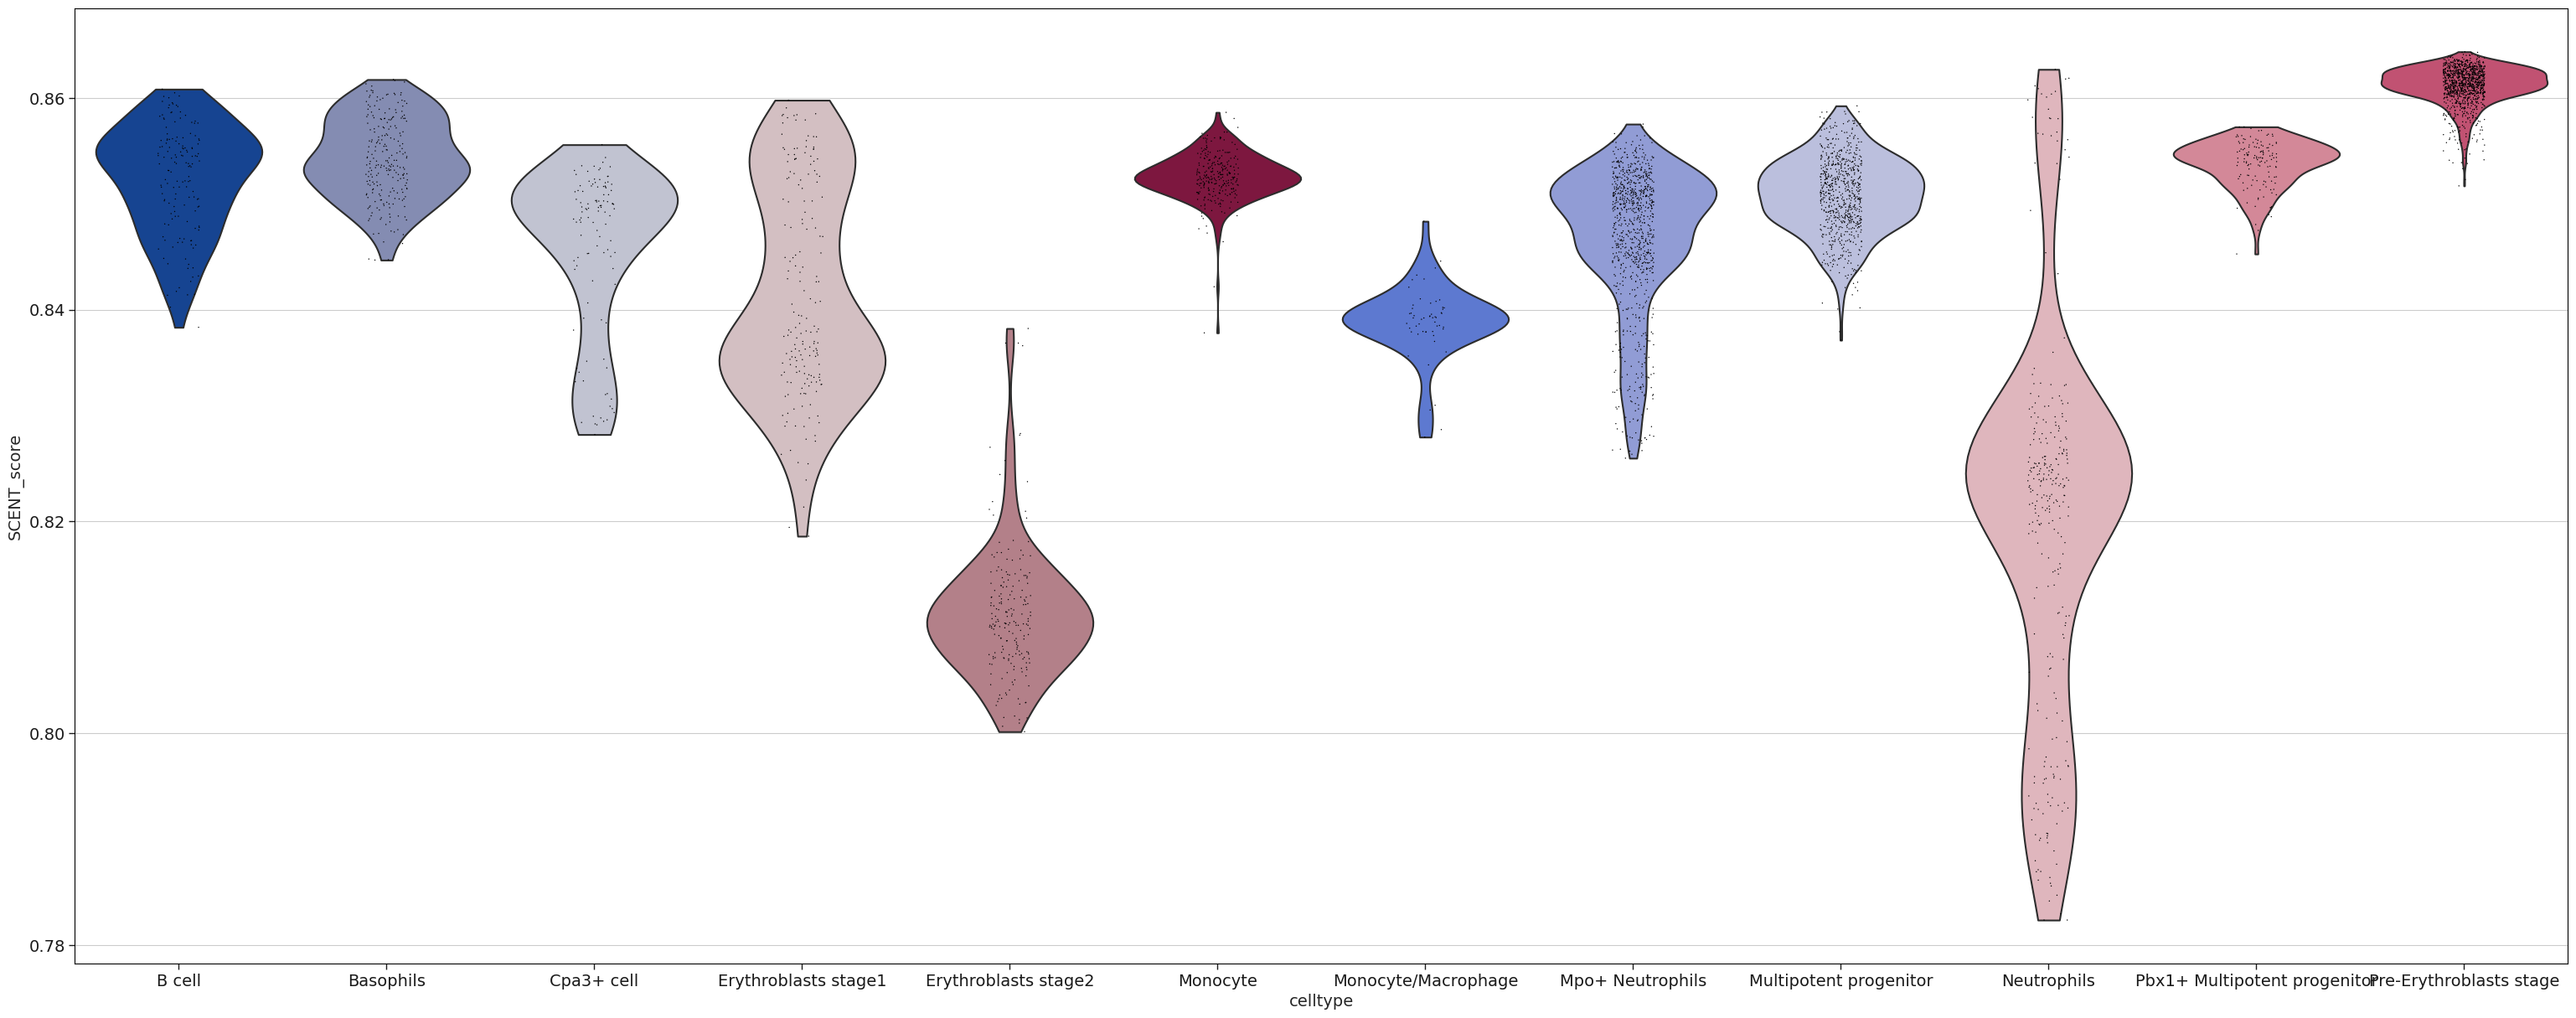

In [100]:
from matplotlib.pyplot import rc_context
sc.settings.set_figure_params(dpi=100, facecolor='white')
with rc_context({'figure.figsize': (28.5, 15)}):
    sc.pl.violin(adata, ['SCENT_score'], groupby='celltype')

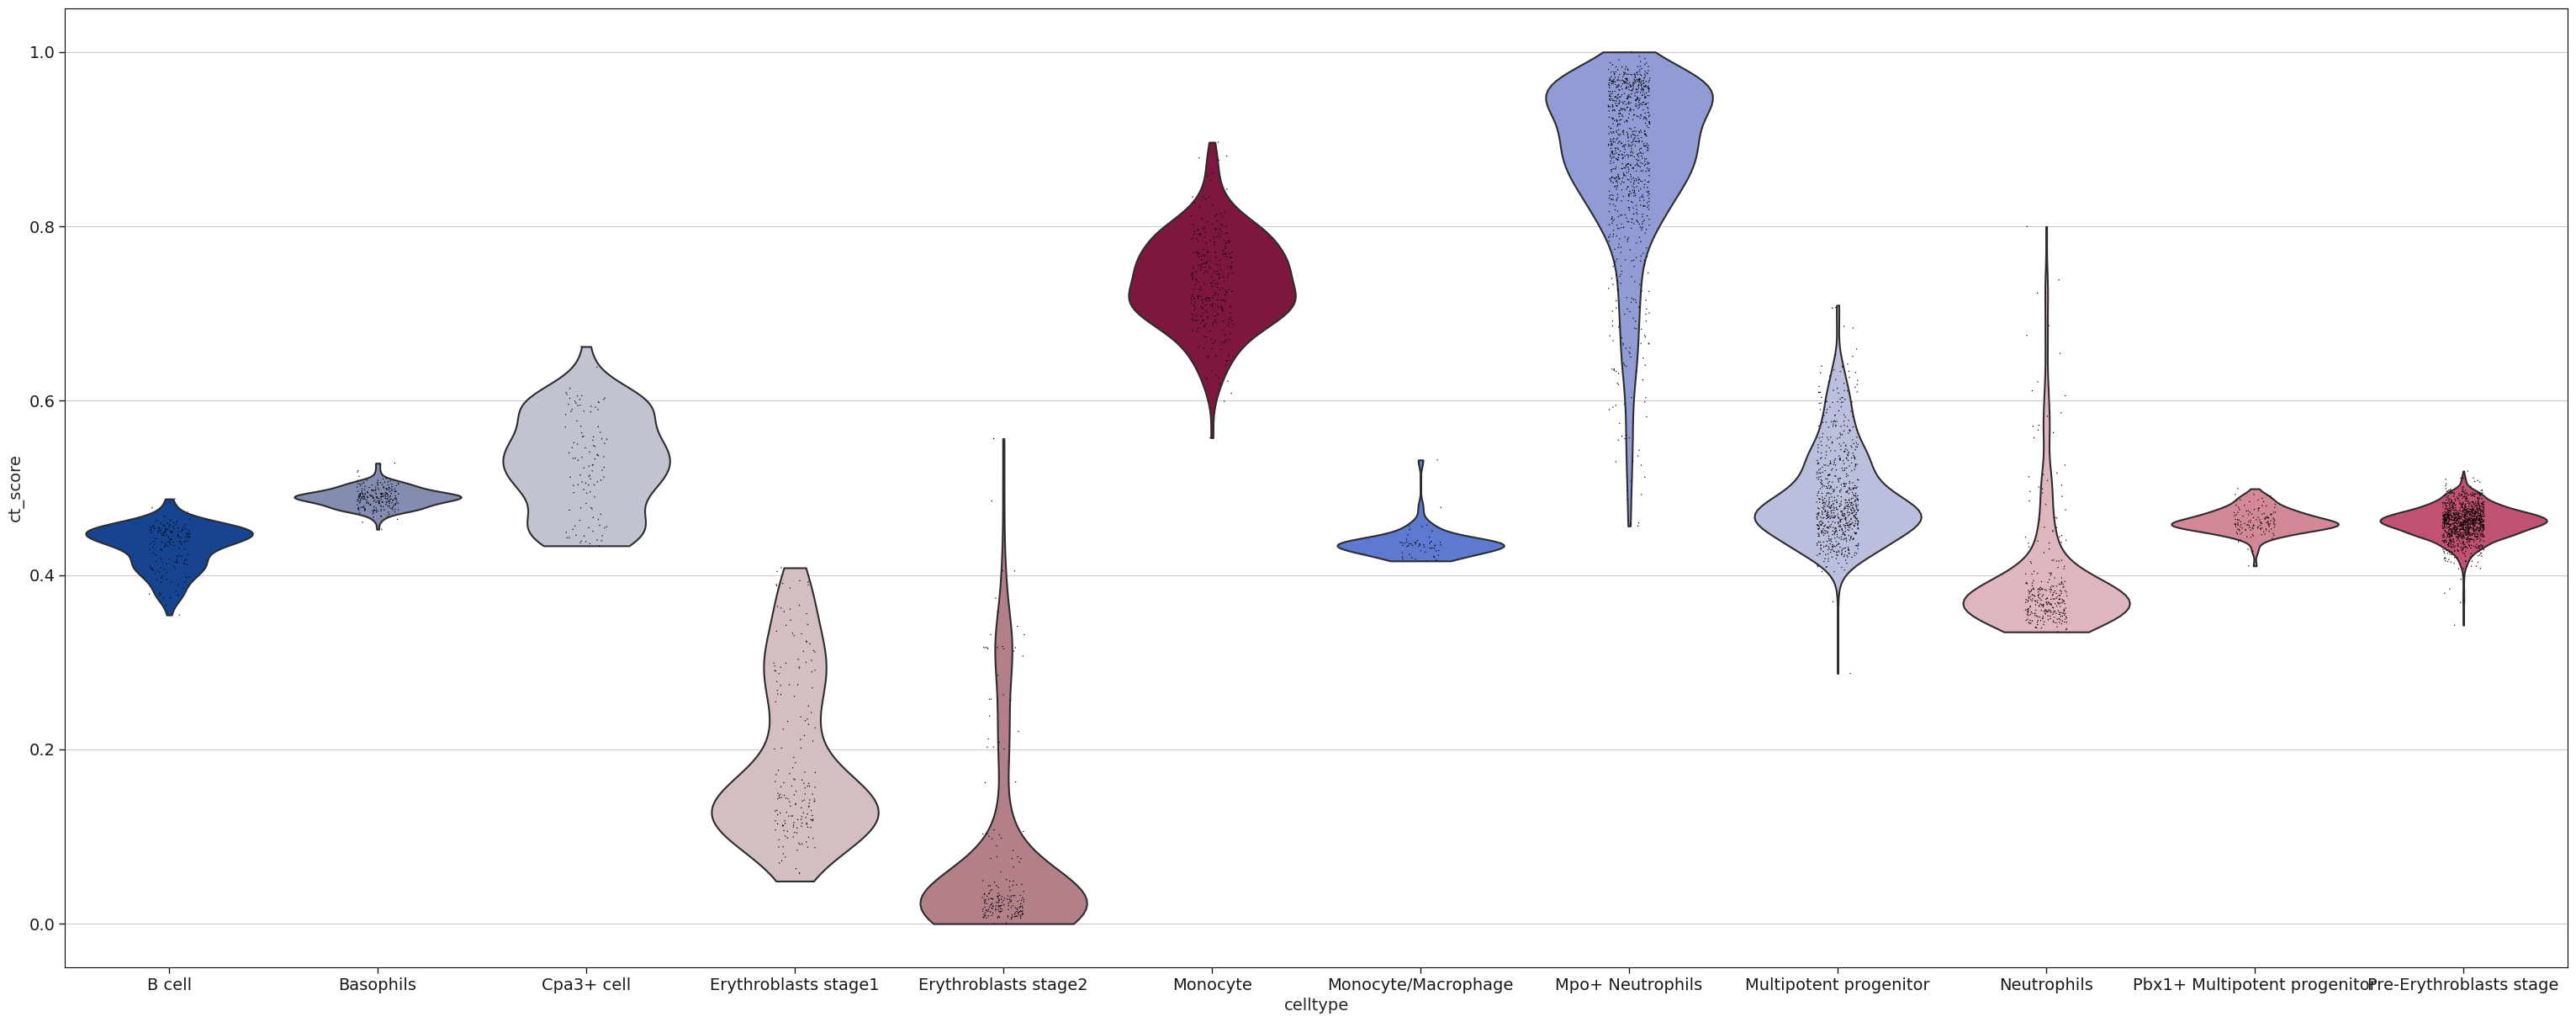

In [96]:
from matplotlib.pyplot import rc_context
sc.settings.set_figure_params(dpi=100, facecolor='white')
with rc_context({'figure.figsize': (28.5, 15)}):
    sc.pl.violin(adata, ['ct_score'], groupby='celltype')